# Praktikum 3: Clustering

---

# Aufgabe 1: K-Means Clustering und Visualisierung

**Ziel**: Verstehen und Anwenden von K-Means Clustering auf einen Datensatz und Visualisieren der Ergebnisse.

**Aufgabenübersicht**:

1. **Datenvorverarbeitung**:
   - Ladet den bereitgestellten Datensatz.
   - Auswahl der Features.
   - Standardisiert die für das K-Means-Clustering geeigneten Merkmale.

2. **K-Means-Clustering**:
   - Wendet den K-Means-Algorithmus auf den Datensatz an. Wählt eine geeignete Anzahl von Clustern (k) und begründet eure Wahl.
   - Weist jedem Datenpunkt Cluster-Labels zu.

3. **Pairplot-Analyse**:
   - Erstellt ein `pairplot` mit `seaborn`, um die Verteilung der Merkmale des Datensatzes innerhalb der Cluster zu visualisieren.
   - Identifiziert alle offensichtlichen Beziehungen oder Korrelationen zwischen den Merkmalen innerhalb und zwischen den Clustern.

4. **Analyse und Reflexion**:
   - Verfasst eine kurze Analyse der Clustering-Ergebnisse. Diskutiert alle in den Clustern beobachteten Muster oder Erkenntnisse.
   - Denkt über die Effektivität des K-Means-Algorithmus bei der Analyse dieses Datensatzes nach.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1. Datenvorverarbeitung

### 1.1 Daten laden

In [5]:
# TODO: Hier soll euer Code stehen.
# Daten mit Pandas einlesen
youtube_data = pd.read_csv('data.csv')
# Anzeigen der ersten 5 Zeilen der Datei
youtube_data.head()

,Unnamed: 0,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,...,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name,duration_category,day_of_week
0,2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",255,True,True,rectangular,26.125556,0,...,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming,0-5 min,Saturday
1,7,2021-04-04 21:57:24+00:00,Technoblade,"I Must Win MrBeast's $10,000 Refrigerator",788,False,True,rectangular,76.758889,0,...,1,4036487,52586.574121,6988056,594257.0,3372.0,30740.0,Gaming,10-15 min,Sunday
2,9,2021-04-03 18:58:05+00:00,ELoTRiX - Clips,ROLEX von UNSYMPATHISCHTV GESCHENKT BEKOMMEN -...,238,False,True,rectangular,0.477778,0,...,10,1724,3608.372093,220157,16823.0,159.0,494.0,Gaming,0-5 min,Saturday
3,19,2021-04-04 19:00:00+00:00,Grian,Hermitcraft 7: Episode 73 - C.E.O of BARGE Co.,1374,False,True,rectangular,50.442222,0,...,3,678741,13455.810829,1983417,119843.0,807.0,21864.0,Gaming,20-25 min,Sunday
4,24,2021-04-04 18:14:54+00:00,MrBeast Gaming,Hide And Seek Across The Earth!,589,False,True,rectangular,69.658889,0,...,6,6372900,91487.247380,14851126,697718.0,9338.0,50360.0,Gaming,5-10 min,Sunday


In [3]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!

,Unnamed: 0,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,...,best_rank,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name,duration_category,day_of_week
0,2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",255,True,True,rectangular,26.125556,0,...,3,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming,0-5 min,Saturday
1,7,2021-04-04 21:57:24+00:00,Technoblade,"I Must Win MrBeast's $10,000 Refrigerator",788,False,True,rectangular,76.758889,0,...,1,4036487,52586.574121,6988056,594257.0,3372.0,30740.0,Gaming,10-15 min,Sunday
2,9,2021-04-03 18:58:05+00:00,ELoTRiX - Clips,ROLEX von UNSYMPATHISCHTV GESCHENKT BEKOMMEN -...,238,False,True,rectangular,0.477778,0,...,10,1724,3608.372093,220157,16823.0,159.0,494.0,Gaming,0-5 min,Saturday
3,19,2021-04-04 19:00:00+00:00,Grian,Hermitcraft 7: Episode 73 - C.E.O of BARGE Co.,1374,False,True,rectangular,50.442222,0,...,3,678741,13455.810829,1983417,119843.0,807.0,21864.0,Gaming,20-25 min,Sunday
4,24,2021-04-04 18:14:54+00:00,MrBeast Gaming,Hide And Seek Across The Earth!,589,False,True,rectangular,69.658889,0,...,6,6372900,91487.247380,14851126,697718.0,9338.0,50360.0,Gaming,5-10 min,Sunday


### 1.2 Features auswählen

Für unsere Analyse verwenden wir die folgenden Merkmale: `duration`, `views_growth`, `likes_cleaned`, `dislikes_cleaned`, `comments_cleaned`. Diese repräsentieren verschiedene Aspekte der Video-Engagement-Daten.

In [23]:
# TODO: Hier soll euer Code stehen.
# Select needed columns by name
df = youtube_data[['duration', 'views_growth', 'likes_cleaned', 'dislikes_cleaned', 'comments_cleaned']]
# Anzeigen der ersten 5 Zeilen des DataFrames
df.head()

,duration,views_growth,likes_cleaned,dislikes_cleaned,comments_cleaned
0,255,3051500,940030.0,11778.0,114130.0
1,788,4036487,594257.0,3372.0,30740.0
2,238,1724,16823.0,159.0,494.0
3,1374,678741,119843.0,807.0,21864.0
4,589,6372900,697718.0,9338.0,50360.0


In [5]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!

,duration,views_growth,likes_cleaned,dislikes_cleaned,comments_cleaned
0,255,3051500,940030.0,11778.0,114130.0
1,788,4036487,594257.0,3372.0,30740.0
2,238,1724,16823.0,159.0,494.0
3,1374,678741,119843.0,807.0,21864.0
4,589,6372900,697718.0,9338.0,50360.0


### 1.3 Daten standardisieren

Da K-Means von der Skalierung der Daten beeinflusst wird, müsst ihr die Daten standardisieren, um sicherzustellen, dass jedes Merkmal gleich gewichtet wird. Verwendet `StandardScaler` aus der `sklearn.preprocessing` Bibliothek, um die ausgewählten Merkmale zu standardisieren.

In [25]:
# TODO: Hier soll euer Code stehen.
# df_ary = df.to_numpy()
scaler = StandardScaler().fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[-0.71174586,  1.19097261,  5.03566024,  2.94984866,  7.13646551],
       [ 0.01610452,  1.71201276,  2.96966678,  0.52385359,  1.5975278 ],
       [-0.7349606 , -0.42230324, -0.48050103, -0.40342718, -0.4114746 ],
       ...,
       [-1.0230965 , -0.42032802, -0.50197517, -0.40660182, -0.44030179],
       [-0.30343955, -0.41891353, -0.53594902, -0.41352828, -0.42588819],
       [-0.84830316, -0.38074168,  0.75297188, -0.19765339,  0.32554486]])

In [7]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!

array([[-0.71174586,  1.19097261,  5.03566024,  2.94984866,  7.13646551],
       [ 0.01610452,  1.71201276,  2.96966678,  0.52385359,  1.5975278 ],
       [-0.7349606 , -0.42230324, -0.48050103, -0.40342718, -0.4114746 ],
       ...,
       [-1.0230965 , -0.42032802, -0.50197517, -0.40660182, -0.44030179],
       [-0.30343955, -0.41891353, -0.53594902, -0.41352828, -0.42588819],
       [-0.84830316, -0.38074168,  0.75297188, -0.19765339,  0.32554486]])

## 2. K-Means-Clustering

### 2.1 Anwendung der Ellbogen-Methode

- Die "Inertia" stellt die Summe der Quadrate innerhalb der Cluster dar, die tendenziell abnimmt, wenn die Anzahl der Cluster erhöht wird. Eine gängige Methode zur Bestimmung der optimalen Anzahl von Clustern ist die Ellbogen-Methode, bei der nach einem Punkt im Plot gesucht wird, an dem sich die Abnahmerate stark verändert und einem "Ellbogen" ähnelt.
- Führt die K-Means-Clustering-Methode auf den standardisierten Daten durch.
- Testet verschiedene Werte für k und berechnet die inertia.
- Plottet die berechneten Werte.

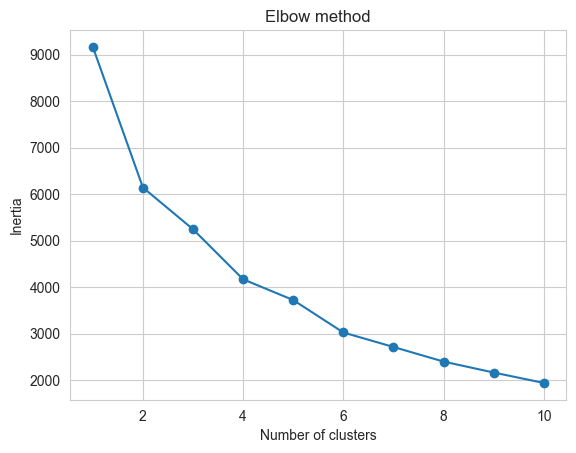

In [26]:
# TODO: Hier soll euer Code stehen.
# The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "elbow" and is a good estimate for the best value for K based on our data. https://www.w3schools.com/python/python_ml_k-means.asp
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

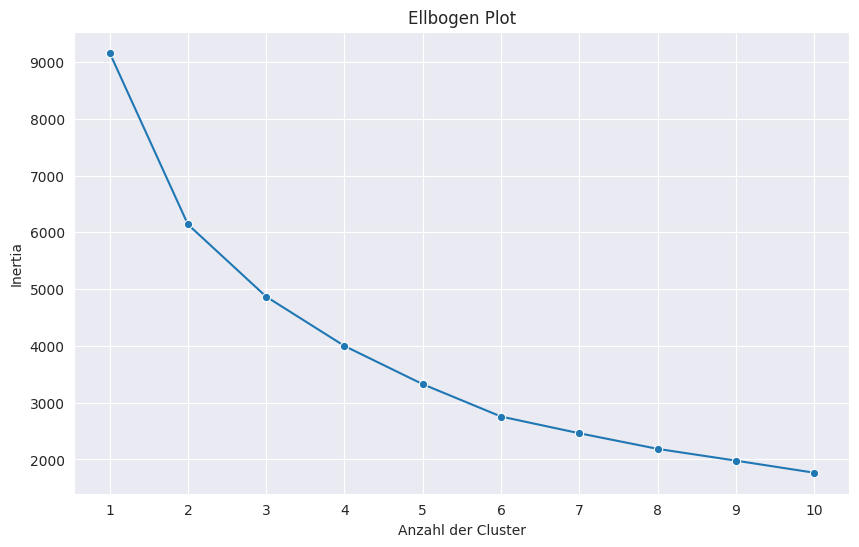

In [9]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!

### 2.2 Anzahl der Cluster bestimmen

- Wählt eine geeignete Anzahl von Clustern (k) anhand des Elbow-Diagrams und begründet eure Wahl.
- Hinweis: es gibt hier keine 100% richtige Antwort.
- Fahrt mit K-Means-Clustering unter Verwendung der gewählten Anzahl von Clustern fort.

In [44]:
# TODO: Hier soll euer Code stehen.
# We take the value k where the rate of decline decreases. We want k to be located exactly at the elbow. The slow downward drift is telling us the extra clusters are not doing anything special for us. In our case we take k = 4.
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)
youtube_data.loc[:, 'cluster'] = kmeans.labels_
df.loc[:, 'cluster'] = kmeans.labels_
youtube_data.head()

,Unnamed: 0,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,...,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name,duration_category,day_of_week,cluster
0,2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TONS of Skins, and a New Game mode!?",255,True,True,rectangular,26.125556,0,...,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming,0-5 min,Saturday,2
1,7,2021-04-04 21:57:24+00:00,Technoblade,"I Must Win MrBeast's $10,000 Refrigerator",788,False,True,rectangular,76.758889,0,...,4036487,52586.574121,6988056,594257.0,3372.0,30740.0,Gaming,10-15 min,Sunday,2
2,9,2021-04-03 18:58:05+00:00,ELoTRiX - Clips,ROLEX von UNSYMPATHISCHTV GESCHENKT BEKOMMEN - PAKET VON MARC GEBAUER | ELoTRiX Clips,238,False,True,rectangular,0.477778,0,...,1724,3608.372093,220157,16823.0,159.0,494.0,Gaming,0-5 min,Saturday,0
3,19,2021-04-04 19:00:00+00:00,Grian,Hermitcraft 7: Episode 73 - C.E.O of BARGE Co.,1374,False,True,rectangular,50.442222,0,...,678741,13455.810829,1983417,119843.0,807.0,21864.0,Gaming,20-25 min,Sunday,0
4,24,2021-04-04 18:14:54+00:00,MrBeast Gaming,Hide And Seek Across The Earth!,589,False,True,rectangular,69.658889,0,...,6372900,91487.247380,14851126,697718.0,9338.0,50360.0,Gaming,5-10 min,Sunday,2


In [11]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!

,Unnamed: 0,published_at,channel,title,duration,caption,licensed_content,projection,trend_time_hours,weekday,...,views_growth,views_growth/hour,views_cleaned,likes_cleaned,dislikes_cleaned,comments_cleaned,category_name,duration_category,day_of_week,Cluster
0,2,2021-04-03 13:00:14+00:00,Brawl Stars,"Brawl Stars: Brawl Talk! Two New Brawlers, TON...",255,True,True,rectangular,26.125556,0,...,3051500,116801.343937,20797544,940030.0,11778.0,114130.0,Gaming,0-5 min,Saturday,3
1,7,2021-04-04 21:57:24+00:00,Technoblade,"I Must Win MrBeast's $10,000 Refrigerator",788,False,True,rectangular,76.758889,0,...,4036487,52586.574121,6988056,594257.0,3372.0,30740.0,Gaming,10-15 min,Sunday,2
2,9,2021-04-03 18:58:05+00:00,ELoTRiX - Clips,ROLEX von UNSYMPATHISCHTV GESCHENKT BEKOMMEN -...,238,False,True,rectangular,0.477778,0,...,1724,3608.372093,220157,16823.0,159.0,494.0,Gaming,0-5 min,Saturday,1
3,19,2021-04-04 19:00:00+00:00,Grian,Hermitcraft 7: Episode 73 - C.E.O of BARGE Co.,1374,False,True,rectangular,50.442222,0,...,678741,13455.810829,1983417,119843.0,807.0,21864.0,Gaming,20-25 min,Sunday,0
4,24,2021-04-04 18:14:54+00:00,MrBeast Gaming,Hide And Seek Across The Earth!,589,False,True,rectangular,69.658889,0,...,6372900,91487.247380,14851126,697718.0,9338.0,50360.0,Gaming,5-10 min,Sunday,2


## 3. Pairplot-Analyse:

   - Erstellt ein `pairplot` mit `seaborn`, um die Verteilung der Merkmale des Datensatzes innerhalb der Cluster zu visualisieren.
   - Identifiziert alle offensichtlichen Beziehungen oder Korrelationen zwischen den Merkmalen innerhalb und zwischen den Clustern und beschreibt diese kurz.

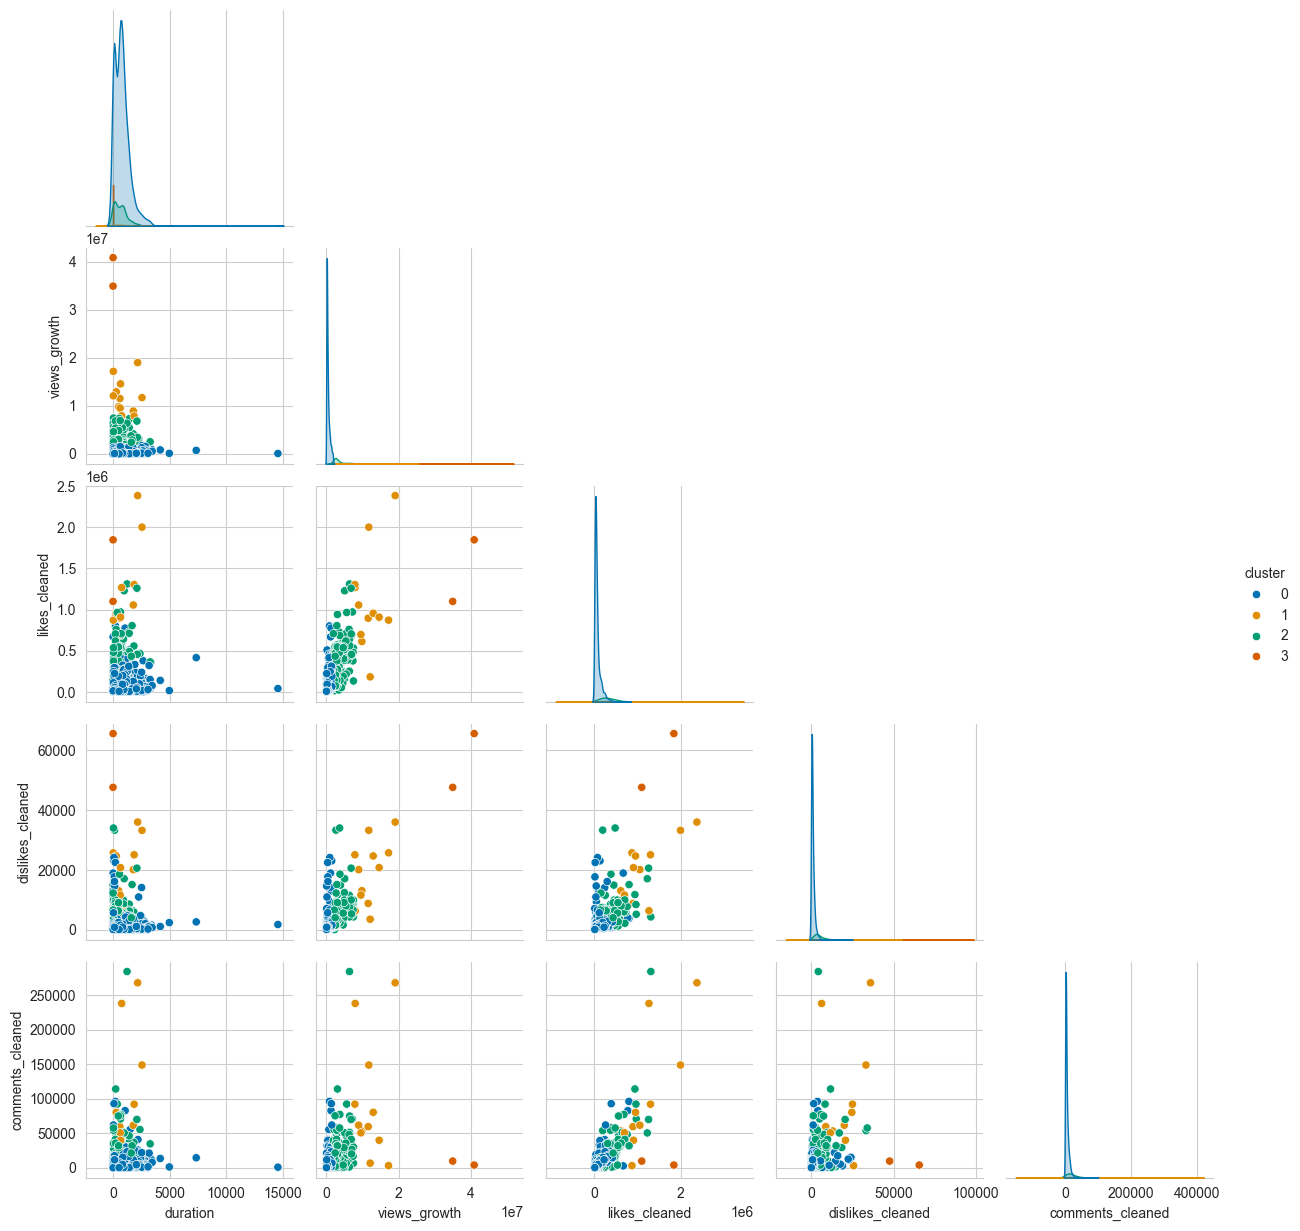

In [53]:
# TODO: Hier soll euer Code stehen.
sns.pairplot(df, hue = 'cluster', palette = 'colorblind', corner = True)

- Videos mit der Länge bis ca. 2500 Sekunden haben die meisten Likes.
- Die kürzesten Videos haben die größte Anzahl von Dislikes.
- Innerhalb Cluster 2: Zu beobachten ist die inverse Korrelation zwischen der Anzahl von Likes und der Länge eines Videos (Duration) und dem Wachstum der Views seitdem das Video in den Trends ist (Views Growth) und der Anzahl den Kommentaren.

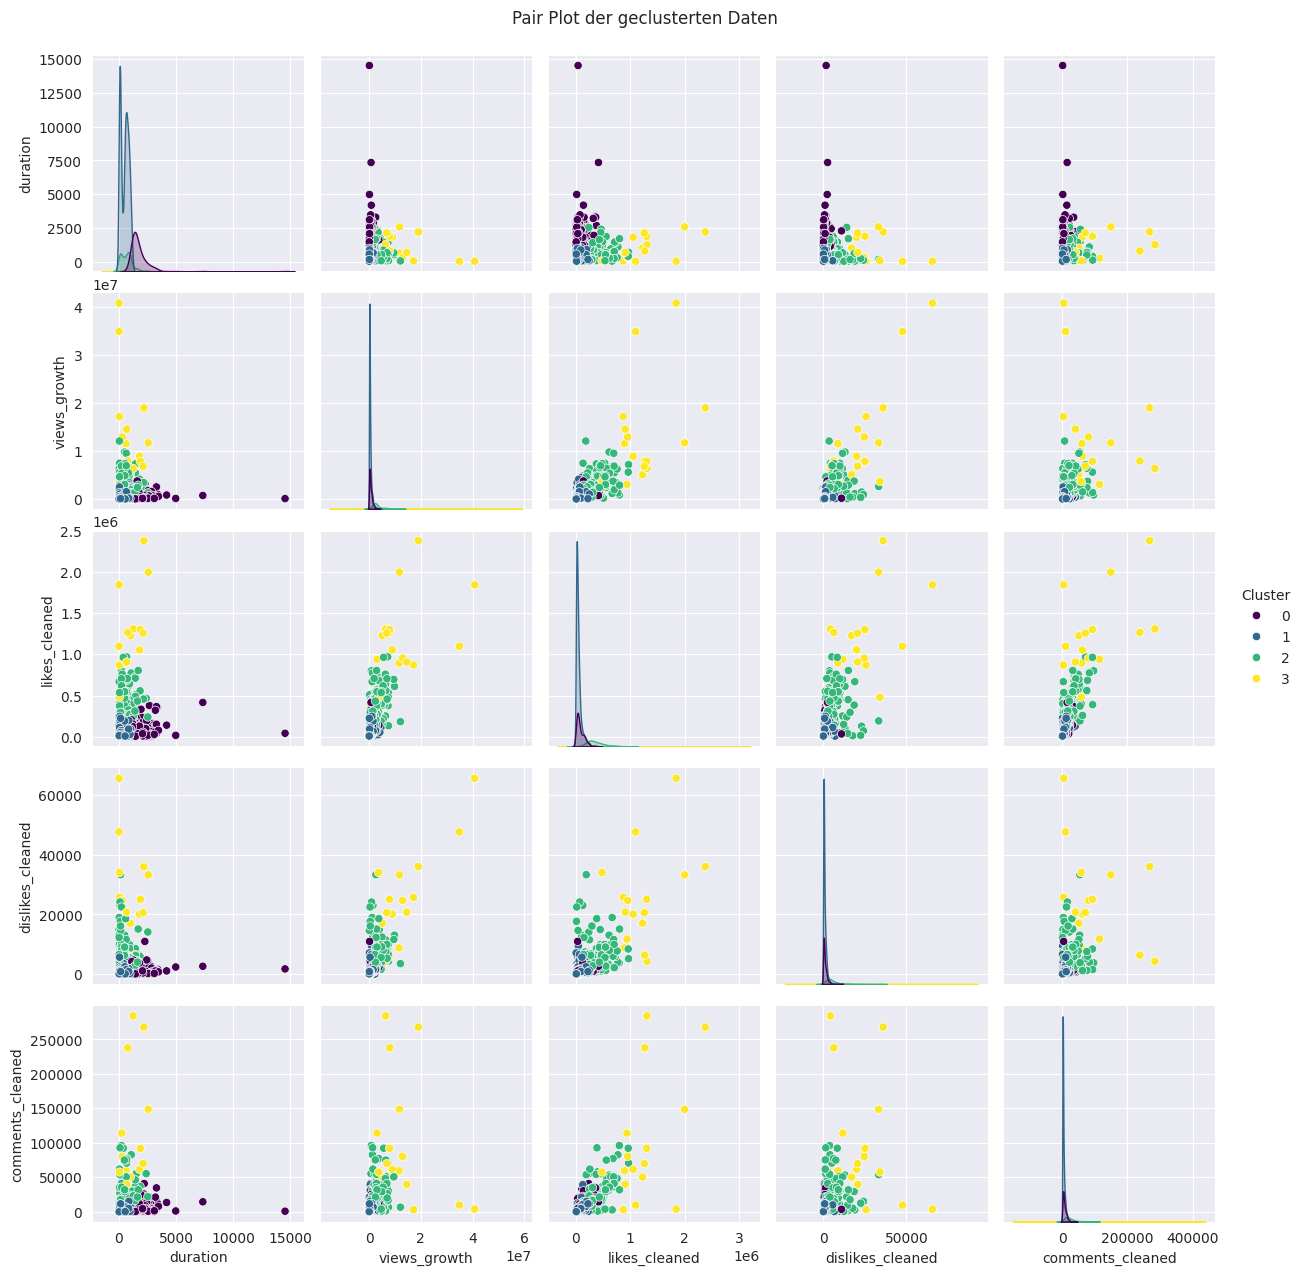

In [13]:
# Diese Zelle nicht ausführen sonst verschwindet der Output!